In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import glob
import os

In [12]:
def plot_history(name, keys):
    history = pickle.load(open("histories/" + name + ".pt" , "rb"))
    num_episodes = len(history[keys[0]])
    fig = plt.figure(figsize = (20,5))
    plot_position = 1
    n_plots = (len(keys))
    plot_color =  {
    'num_coins_collected' : "gold",
    'cumulative_reward' : "green",
    'num_crates_destroyed' : "peru",
    'round_length'    : "black",
    'num_invalid_actions': "red",
    }
    for x in keys:
        
        array = np.array(history[x])
        plt.subplot(1,n_plots,plot_position)
        plt.plot(np.arange(num_episodes), array, color =plot_color[x],label=f"{x}")
        plot_position += 1
        plt.legend(loc=1)
    plt.show()                    

In [25]:
def plot_average_histories(folder_name, keys):
    histories = [pickle.load(open(historyPath, "rb")) for historyPath in glob.glob(f'{"histories/"+ folder_name}/*.pt')]
    num_episodes = len(histories[0][keys[0]])
    
    fig = plt.figure(figsize = (20,5))
    plot_position = 1
    n_plots = (len(keys))
    plot_color =  {
    'num_coins_collected' : "gold",
    'cumulative_reward' : "green",
    'num_crates_destroyed' : "peru",
    'round_length'    : "black",
    'num_invalid_actions': "red",
    }
        
    for x in keys:
        array = np.stack([np.array(history[x]) for history in histories])
        mean_array = np.mean(array, axis=0)
        plt.subplot(1,n_plots,plot_position)
        plt.plot(np.arange(num_episodes), mean_array,  color = plot_color[x],label=f"{x}")
        plot_position += 1
        plt.legend(loc=1)
    plt.show()
    

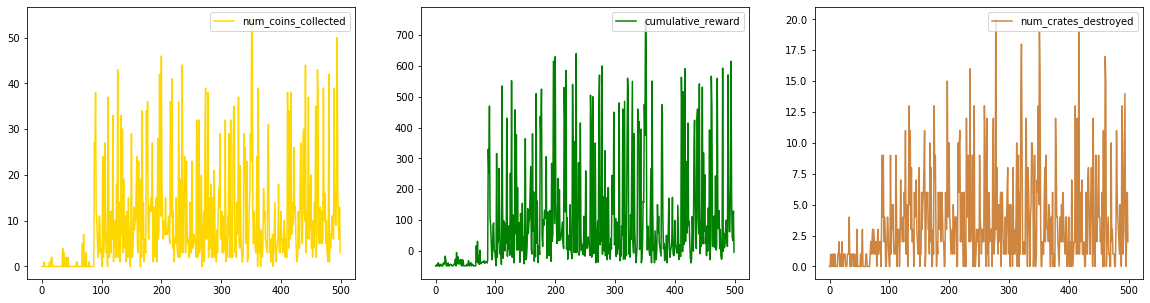

In [15]:
plot_history("N-STEP-SARSA-N=1/26_03_2021_12_03_21_100697",['num_coins_collected','cumulative_reward','num_crates_destroyed'])

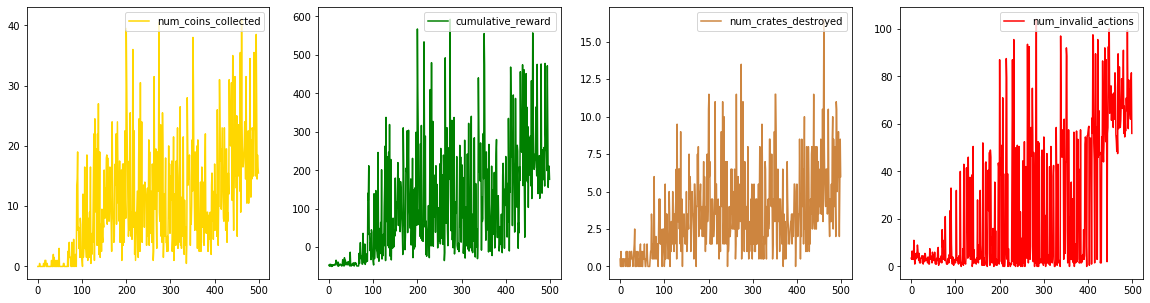

In [26]:
plot_average_histories("N-STEP-SARSA-N=1",['num_coins_collected','cumulative_reward','num_crates_destroyed','num_invalid_actions'])

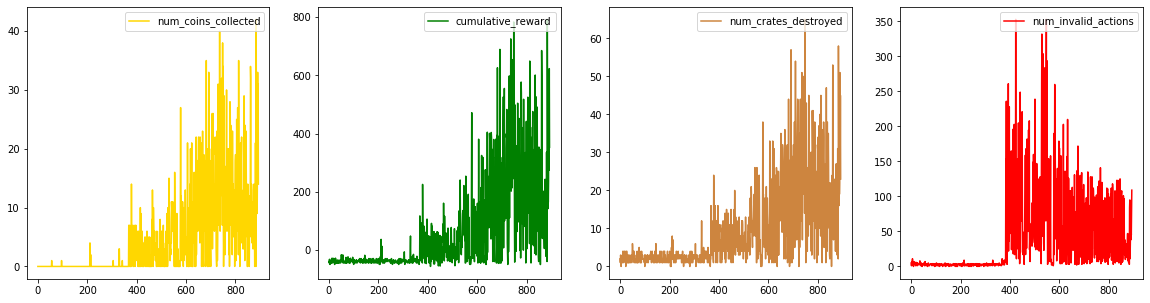

In [29]:
plot_history("N-STEP-SARSA-N=4,crate_density=0.5/26_03_2021_12_45_49_753113",['num_coins_collected','cumulative_reward','num_crates_destroyed','num_invalid_actions'])

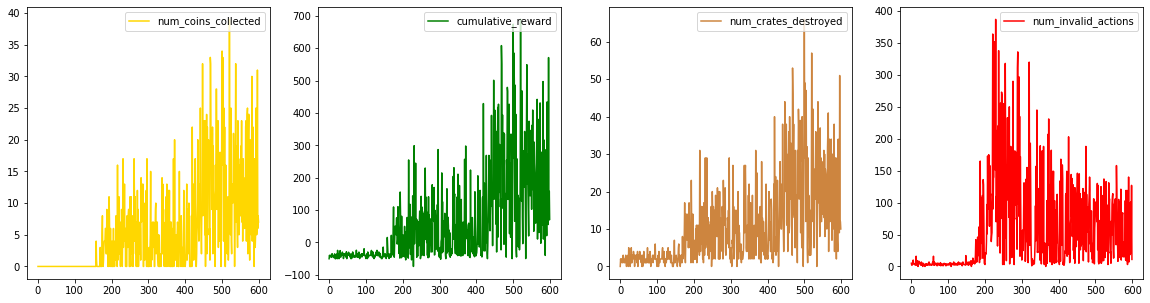

In [34]:
plot_history("N-STEP-SARSA-N=4,crate_density=0.5/26_03_2021_13_04_26_494991",['num_coins_collected','cumulative_reward','num_crates_destroyed','num_invalid_actions'])

In [35]:
plot_history("N-STEP-SARSA-N=4,crate_density=0.5,no_rew_4_bombs,coins=2/26_03_2021_13_48_06_628798",['num_coins_collected','cumulative_reward','num_crates_destroyed','num_invalid_actions'])

FileNotFoundError: [Errno 2] No such file or directory: 'histories/N-STEP-SARSA-N=4,crate_density=0.5,no_rew_4_bombs,coins=2/26_03_2021_13_48_06_628798.pt'